## Import:

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Cleaning and Training/Test set creation:

In [96]:
dataValDict = {'gender': {'Male': 0, 'Female': 1, 'Other': 3}, 'smoking_history': {'never': 0, 'current': 1, 'ever': 2, 'former': 3, 'not current': 4}}

#Original file is saved as original data.  Df will be 'cleaned' file.
df = data[data['gender'] != 'Other']
df = data[data['smoking_history'] != 'No Info']

df = df.replace(dataValDict)
df['gender'] = pd.to_numeric(df['gender'])
df.info()
df

#Split features from (diabetes) label

features = ['gender', 'age','hypertension','heart_disease','smoking_history', 'bmi','HbA1c_level','blood_glucose_level']
X = df.loc[:, features]
y = df.loc[:, 'diabetes']

#Data will be shuffled before split by default. No stratification. Test size = 30% of set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)
X_train.shape, X_test.shape
#Create np array versions of test and train data
X_trn_np = X_train.to_numpy() 
X_tst_np = X_test.to_numpy() 
y_trn_np = y_train.to_numpy() 
y_tst_np = y_test.to_numpy()

<class 'pandas.core.frame.DataFrame'>
Index: 64184 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64184 non-null  int64  
 1   age                  64184 non-null  float64
 2   hypertension         64184 non-null  int64  
 3   heart_disease        64184 non-null  int64  
 4   smoking_history      64184 non-null  int64  
 5   bmi                  64184 non-null  float64
 6   HbA1c_level          64184 non-null  float64
 7   blood_glucose_level  64184 non-null  int64  
 8   diabetes             64184 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.9 MB


## Logistic Regression Model:

In [97]:
param_grid = [
    # For sag solver 
    {
        'penalty': ['l2'],  
        'C': [0.01, 0.1, 1, 10],
        'solver': ['sag'],
        'max_iter': [1000, 1500],
        'multi_class': ['ovr', 'multinomial'],
        'tol': [0.01, 0.1]}, 

    # Penalty is None
    {
        'penalty': [None], 
        'C': [1], 
        'solver': ['sag', 'saga', 'newton-cg', 'lbfgs'],
        'max_iter': [1000, 1500],
        'multi_class': ['ovr', 'multinomial'],
        'tol': [0.01, 0.1]},

    # For saga solver 
    {
        'penalty': ['l1', 'l2'], 
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga'],
        'max_iter': [1000, 1500],
        'multi_class': ['ovr', 'multinomial'],
        'tol': [0.01, 0.1]},

    # For saga solver with elasticnet penalty
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga'],
        'max_iter': [1000, 1500],
        'multi_class': ['ovr', 'multinomial'],
        'tol': [0.01, 0.1],
        'l1_ratio': [0.1, 0.5, 0.9],
        'tol': [0.01, 0.1]},  

    # For liblinear solver
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear'],
        'max_iter': [500, 750, 1000, 1500],
        'multi_class': ['ovr'],
        'tol': [0.01, 0.1]},

    # For lbfgs solver
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs'],
        'max_iter': [500, 750, 1000, 1500],
        'multi_class': ['ovr', 'multinomial'],
        'tol': [0.01, 0.1]}    
    ]

logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_logistic = grid_search.best_estimator_

test_accuracy = best_logistic.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
Test Accuracy: 0.94676983797258


Test Accuracy: 0.9468737017033652
Coefficients: [[-3.02298616e-01  4.72745370e-02  7.44459187e-01  7.47815920e-01
   1.82553852e-03  8.81066343e-02  2.27940257e+00  3.30736154e-02]]


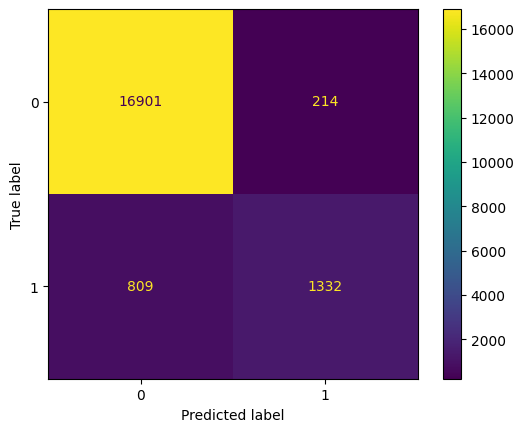

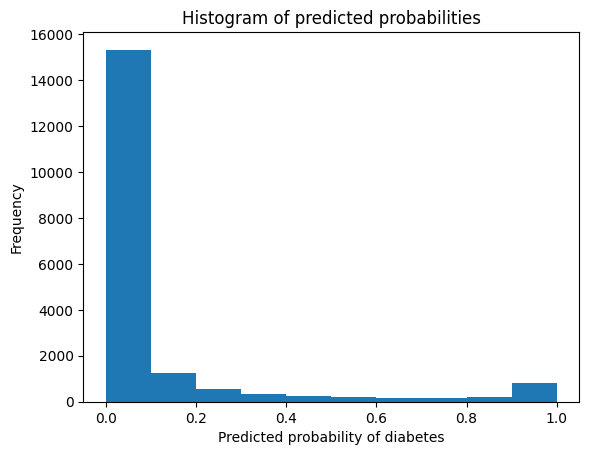

In [98]:
# Initializing and training the Logistic Regression model
tuned_LR_model = LogisticRegression(C = 0.1, max_iter= 1000, multi_class= 'ovr', penalty= 'l2', solver= 'lbfgs', tol= 0.01)
cv_scores = cross_val_score(tuned_LR_model, X_train, y_train, cv=5)
tuned_LR_model.fit(X_train, y_train)
LR_test_accuracy = tuned_LR_model.score(X_test, y_test)
print("Test Accuracy:", LR_test_accuracy)
print('Coefficients:', tuned_LR_model.coef_)

ConfusionMatrixDisplay.from_estimator(tuned_LR_model, X_test, y_test)
plt.show()

y_prob = tuned_LR_model.predict_proba(X_test)
plt.hist(y_prob[:,1], bins=10)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()